<a href="https://colab.research.google.com/github/ekanshtrivedi/machine-learning/blob/master/EXP_2_J066.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

Question 1:-

Import dataset store it as dataframe in python: 

In [2]:
filename="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

Question 2:-

Add column headers to dataset

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
"peak-rpm","city-mpg","highway-mpg","price"]

In [6]:
df = pd.read_csv(filename, names = headers)

In [7]:
df.iloc[2,:]

symboling                      1
normalized-losses              ?
make                 alfa-romero
fuel-type                    gas
aspiration                   std
num-of-doors                 two
body-style             hatchback
drive-wheels                 rwd
engine-location            front
wheel-base                  94.5
length                     171.2
width                       65.5
height                      52.4
curb-weight                 2823
engine-type                 ohcv
num-of-cylinders             six
engine-size                  152
fuel-system                 mpfi
bore                        2.68
stroke                      3.47
compression-ratio              9
horsepower                   154
peak-rpm                    5000
city-mpg                      19
highway-mpg                   26
price                      16500
Name: 2, dtype: object

Question 3:- 

Read the first 5 lines and display

In [8]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Question 4:-

Are there missing data? Or illegal characters in the dataframe?

Answer- As we can see in the above dataset, we can see that there are some columns having "?" as values, The '?' will be replaced by np.nan which is nothing but no value remark.

Question 5:

Replace the character “?” with nan

In [9]:
df.replace("?", np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Question 6:

Count missing values in each column and print it with column name

In [10]:
(df.isna().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Question 7:

Delete price rows that have missing data

In [11]:
df.dropna(subset=["price"], axis=0, inplace=True)

Question 8:

Normalized losses,bore,stroke,horsepower,peak-rpm, - replace missing with mean of the column

In [12]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [13]:
avg_bore=df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)

In [14]:
avg_stroke=df['stroke'].astype('float').mean(axis=0)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)

In [15]:
avg_hp = df["horsepower"].astype("float").mean(axis=0)
df["horsepower"].replace(np.nan, avg_hp, inplace=True)

In [16]:
avg_rpm = df["peak-rpm"].astype("float").mean(axis=0)
df["peak-rpm"].replace(np.nan, avg_rpm, inplace=True)

Question 9:

Num-of-doors replace missing with most frequent value in the column

In [17]:
df['num-of-doors'].value_counts()


four    113
two      86
Name: num-of-doors, dtype: int64

In [18]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Question 10:

Num-of-doors replace missing with most frequent value in the column

In [19]:
df.reset_index(drop=True, inplace=True)

Question 11:

Check datatype of columns and convert numeric/quantitative variables to float or int

In [20]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [21]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [22]:
df["normalized-losses"] = df["normalized-losses"].astype("int")
df["bore"] = df["bore"].astype("float")
df["stroke"] = df["stroke"].astype("float")
df["price"] = df["price"].astype("float")
df["peak-rpm"] = df["peak-rpm"].astype("float")
df["horsepower"] = df["horsepower"].astype("float")

In [23]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Question 12:

Transform city-mpg and highway-mpg into liters/100km using conversion formula: L/100km = 235/mpg i.e. create two new column “city-L/100km” and “highway-L/100km”

In [24]:
df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km']=235/df["highway-mpg"]

In [25]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818


Question 13:

Normalize columns length, width, height so that their values range from 0 to 1



In [26]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [27]:
print(df[["length","width","height"]])

       length     width    height
0    0.811148  0.890278  0.816054
1    0.811148  0.890278  0.816054
2    0.822681  0.909722  0.876254
3    0.848630  0.919444  0.908027
4    0.848630  0.922222  0.908027
..        ...       ...       ...
196  0.907256  0.956944  0.928094
197  0.907256  0.955556  0.928094
198  0.907256  0.956944  0.928094
199  0.907256  0.956944  0.928094
200  0.907256  0.956944  0.928094

[201 rows x 3 columns]


Question 14:

Plot the histogram of horsepower to see its distribution

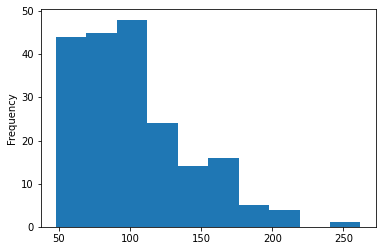

In [28]:
df.horsepower.plot(kind='hist')

Question 15:

Create three equal sized bins “low”, “medium”, “high” and organize values in column horsepower into new column “horsepower-binned”

In [29]:
temp = pd.cut(df['horsepower'], bins = 3, labels = ['low','medium','high'])
df['horsepower-binned'] = temp

In [30]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,low


Question 16:

Plot distribution of “horsepower-binned”

(array([153.,   0.,   0.,   0.,   0.,  43.,   0.,   0.,   0.,   5.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

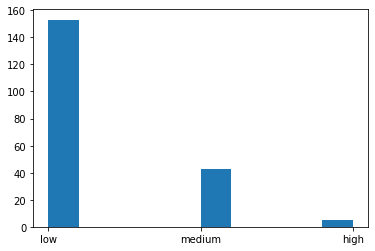

In [31]:
plt.hist(df['horsepower-binned'])

In [32]:
df['horsepower-binned'].value_counts()

low       153
medium     43
high        5
Name: horsepower-binned, dtype: int64

Question 17:

Convert “fuel-type” into one-hot-encoded variables. Repeat same for “aspiration” and then drop columns “fuel-type” and “aspiration”

In [34]:
one_hot1 = pd.get_dummies(df['fuel-type'])
one_hot2 = pd.get_dummies(df['aspiration'])

In [35]:
df = df.join(one_hot1)
df = df.join(one_hot2)
df.drop("fuel-type", axis = 1, inplace=True)
df.drop("aspiration", axis = 1, inplace=True)

In [36]:
df

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,8.392857,low,0,1,1,0
197,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,0.928094,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,9.400000,medium,0,1,0,1
198,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,10.217391,medium,0,1,1,0
199,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,8.703704,low,1,0,0,1


Exercise 2:

Question 1:

Import matplotlib, seaborn, numpy and pandas

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Question 2:

Import the dataset: path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

In [38]:
filename='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(filename)
df.head()




,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Question 3:

See dimensions of data frame and its data types for each column

In [39]:
print(df.shape)
print(df.dtypes)

(201, 29)
symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


Question 4:

Calculate correlation between engine-size and price using corr function

In [40]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Question 5:

Identify variables with positive or negative correlation with price

In [41]:
cor=df.corr()
print(cor)

                   symboling  normalized-losses  ...    diesel       gas
symboling           1.000000           0.466264  ... -0.196735  0.196735
normalized-losses   0.466264           1.000000  ... -0.101546  0.101546
wheel-base         -0.535987          -0.056661  ...  0.307237 -0.307237
length             -0.365404           0.019424  ...  0.211187 -0.211187
width              -0.242423           0.086802  ...  0.244356 -0.244356
height             -0.550160          -0.373737  ...  0.281578 -0.281578
curb-weight        -0.233118           0.099404  ...  0.221046 -0.221046
engine-size        -0.110581           0.112360  ...  0.070779 -0.070779
bore               -0.140019          -0.029862  ...  0.054458 -0.054458
stroke             -0.008245           0.055563  ...  0.241303 -0.241303
compression-ratio  -0.182196          -0.114713  ...  0.985231 -0.985231
horsepower          0.075819           0.217299  ... -0.169053  0.169053
peak-rpm            0.279740           0.239543  ..

In [42]:
for i in df.describe().columns:
    temp = cor['price'][i]
    if (temp > 0):
       print(i)

normalized-losses
wheel-base
length
width
height
curb-weight
engine-size
bore
stroke
compression-ratio
horsepower
price
city-L/100km
diesel


Question 6:

Identify datatype of “peak-rpm”

In [43]:
df["peak-rpm"].dtypes

dtype('float64')

Question 7:

Using seaborn regplot() - plot relation between “engine-size” and “price”. Comment on your observation.

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables.

Question 8:

Identify using regplot() - which other variables can affect “price” and which do not affect it.

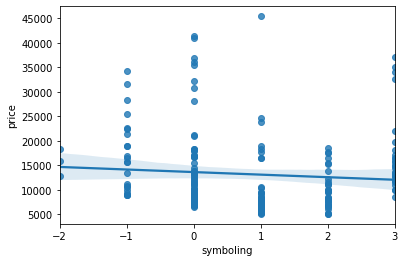

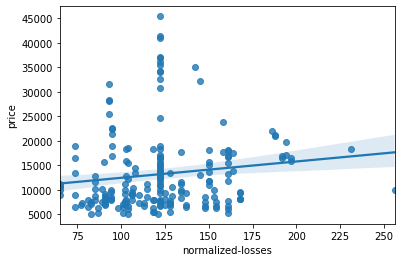

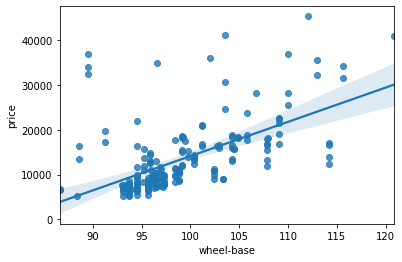

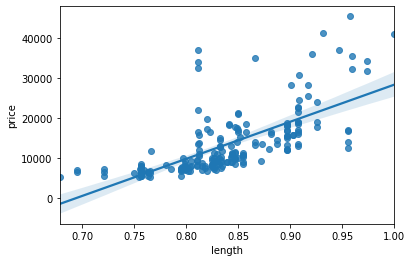

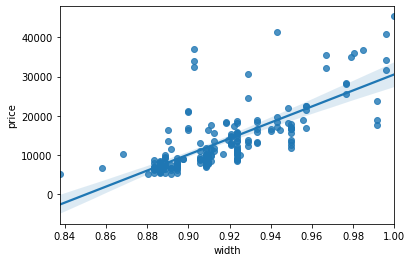

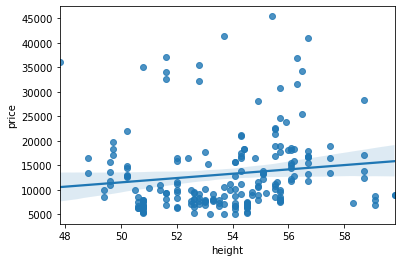

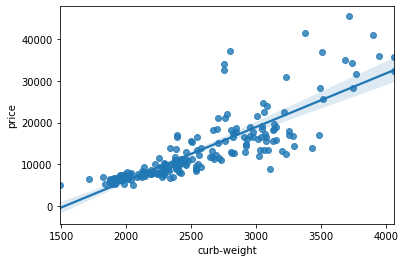

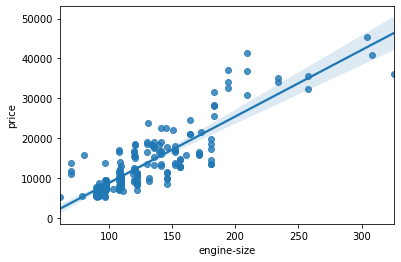

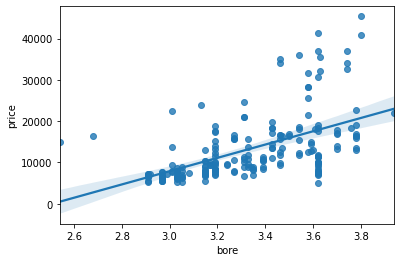

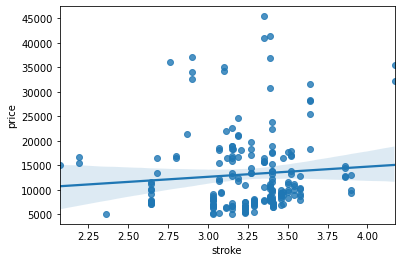

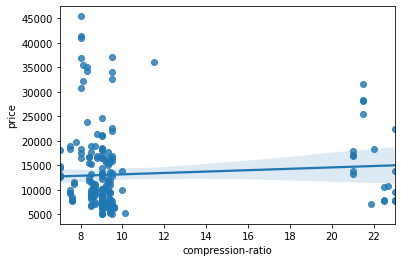

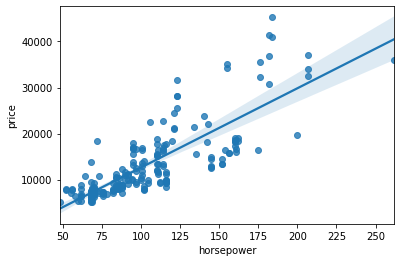

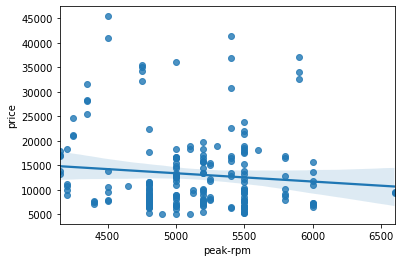

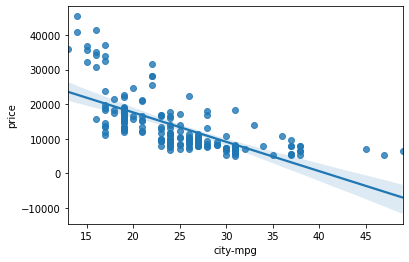

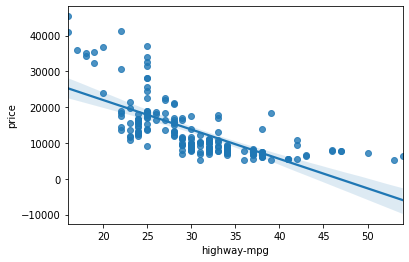

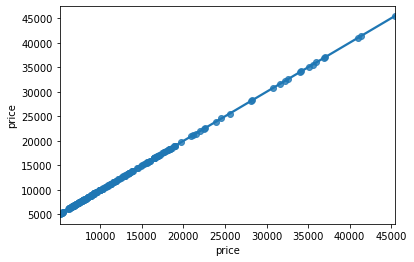

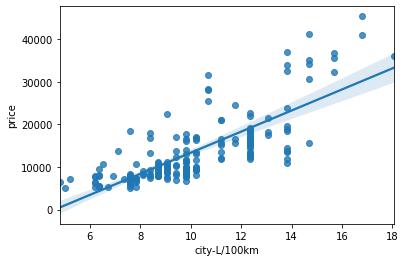

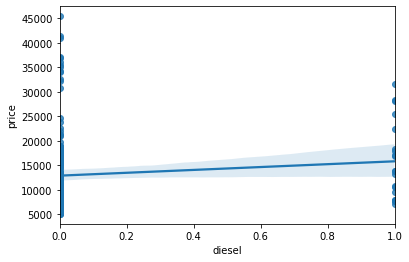

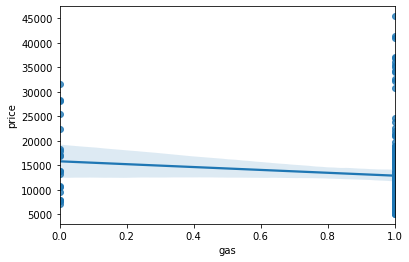

In [44]:
for i in df.describe().columns:
    sns.regplot(x=df[i], y=df.price)
    plt.show()

Question 9:

Use seaborn pairplot() to identify which variables can affect “price”

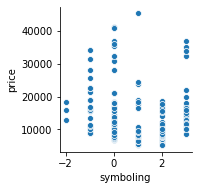

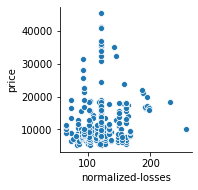

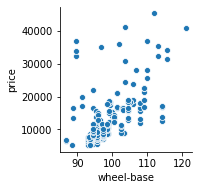

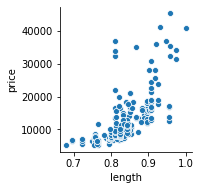

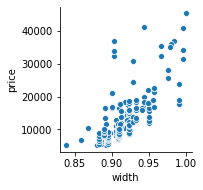

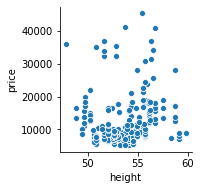

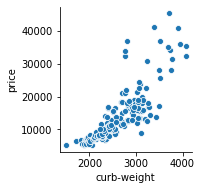

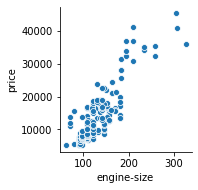

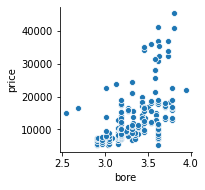

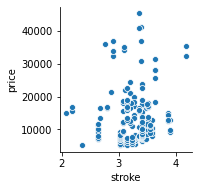

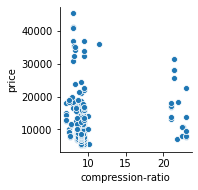

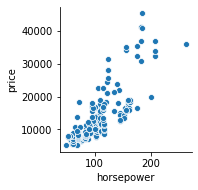

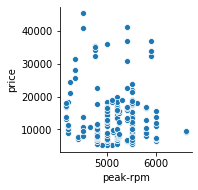

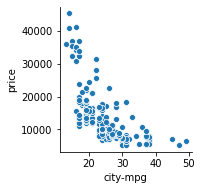

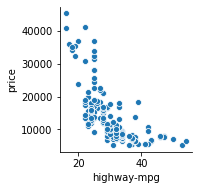

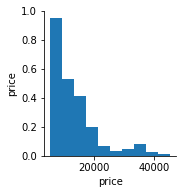

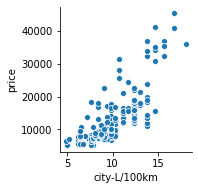

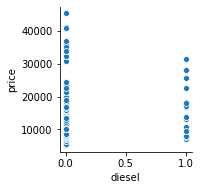

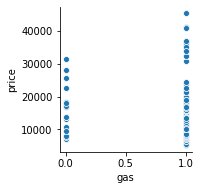

In [45]:
for i in df.select_dtypes([np.number]).columns:
  sns.pairplot(x_vars=i,y_vars='price',data=df)

Question 10:

Draw a heatmap to plot the correlation in the dataframe

In [46]:
relation=df.corr()

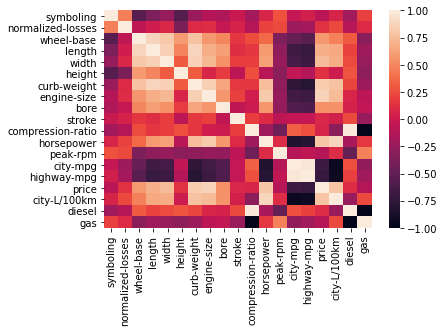

In [47]:
sns.heatmap(relation)
plt.show()

Question 11:

With seaborn boxplot() - compare “body-style” with “price”

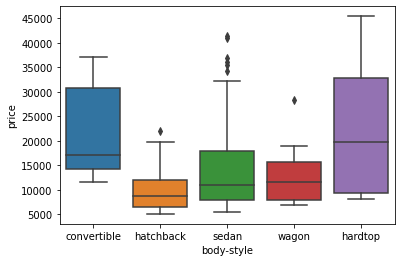

In [48]:
sns.boxplot(x="body-style", y="price", data=df)

Question 12:

Continue for other categorical variables in the dataset.

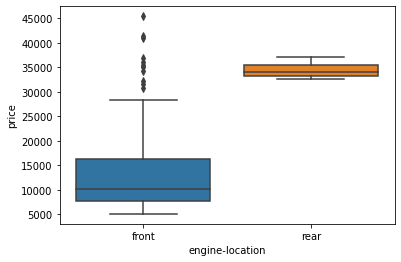

In [49]:
sns.boxplot(x="engine-location", y="price", data=df)

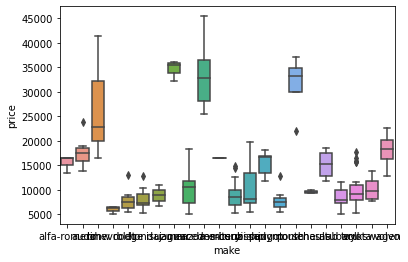

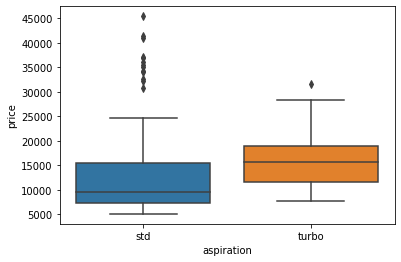

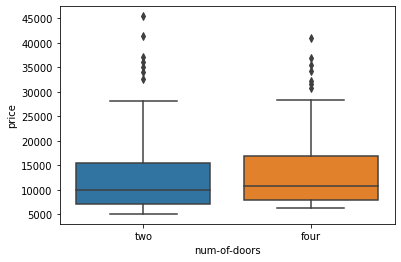

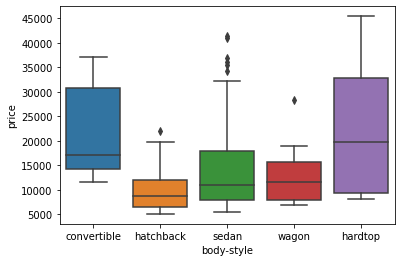

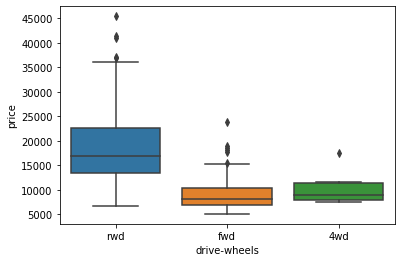

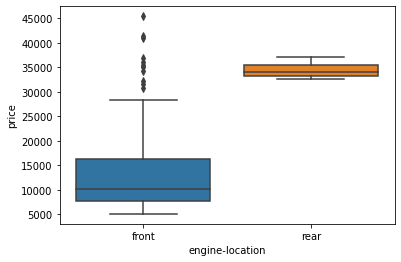

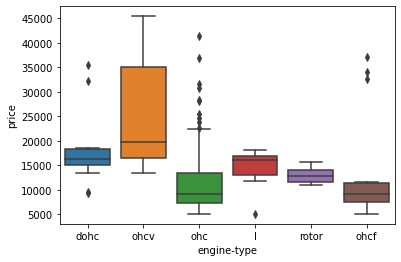

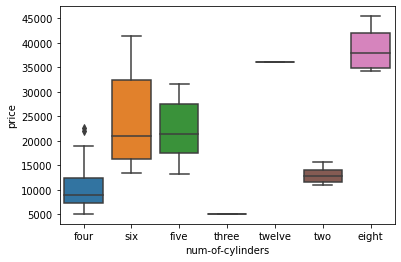

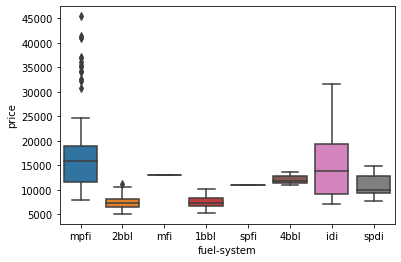

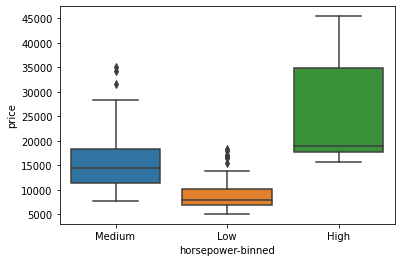

In [50]:
for i in df.describe(include = np.object).columns:
    sns.boxplot(x=df[i], y=df.price)
    plt.show()

Question 13:

What do you infer from the boxplots about the relationship between the variables.

price is related in a varied manner with all the categorical variables. The higher price automobile are less in number as compared to the lower priced automobiles.
The cars with rear engines and the outliers of cars with front engines are majorly sports cars and that is why they are priced higher overall. horsepower-binned - We can see that as the horsepower of a car increases, the price of the car also increases and the range to define the price of a car with low, medium or high horsepower gets broaded and broader.

Question 14:

Use describe() to get descriptive statistics of numeric variables

In [51]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


Question 15:

Use describe() to get stats of categorical variables

In [52]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


Question 16:

Get unique values in each categorical variable along with their frequency. What do you understand by doing this?

on observing we can say that standard is most common 4 doors is the most common variant. Sedan and hatchback are the most popular models. Car engines in the front is common and engine type of ohc with majority having 6 cylinders.

Question 17:

Use groupby() to get the average price of “drive-wheels” wrt “price”. What do you understand by doing this?

In [53]:
df1= df[['drive-wheels','body-style','price']]
grp1 = df1.groupby(['drive-wheels'],as_index=False).mean()
grp1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


Question 18:

Repeat step 17 for other categorical variables.

In [54]:
for i in df.describe(include=np.object).columns:
    print(df.groupby(i)['price'].mean())

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64
aspiration
std      12542.181818
turbo    16254.805556
Name: price, dtype: float64
num-of-doors
four    13498.034783
two     12818.127907
Name: price, dtype: float64
body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wagon          123

A large number of the cars have rear wheel drive with very low to very high prices. That is why we could be seeing a high average for cars with rear wheel drive.

Question 19:

Use groupby() to find the average price for “drive-wheels”and”body-style” with price. Observation? Inference?

In [55]:
df3= df[['drive-wheels','body-style','price']]

In [56]:
grp= df3.groupby(['drive-wheels','body-style'],as_index=False).mean()
grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Rear wheel drive convertibles are the most expensive followed by the hardtop car.

Question 20:

Use pivot() on the result of step 19 to get “drive-wheels” as index and “body-style” as columns. Observations? Inference?

In [57]:
pivot1 = grp.pivot(index='drive-wheels',columns='body-style')
pivot1

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

answer similar to that of answer 19.
